In [60]:
import os
import sys
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
sys.path.append(os.path.join(PROJ_ROOT, 'src'))

%matplotlib inline
%config InlineBackend.figure_format ='retina'

%load_ext autoreload
%autoreload 2

%aimport data, model, features, plot

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from model.training import train
from features.extraction import extract
from data import dataset
from plot import traffic as plot_traffic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from data.dataset import DataSet

traindf = DataSet.traindf
testdf = DataSet.testdf

In [61]:
stationdf = dataset.get_traffic_by_station_df(traindf)

In [50]:
animatiodf = dataset.get_traffic_by_station_for_animation_df(stationdf)

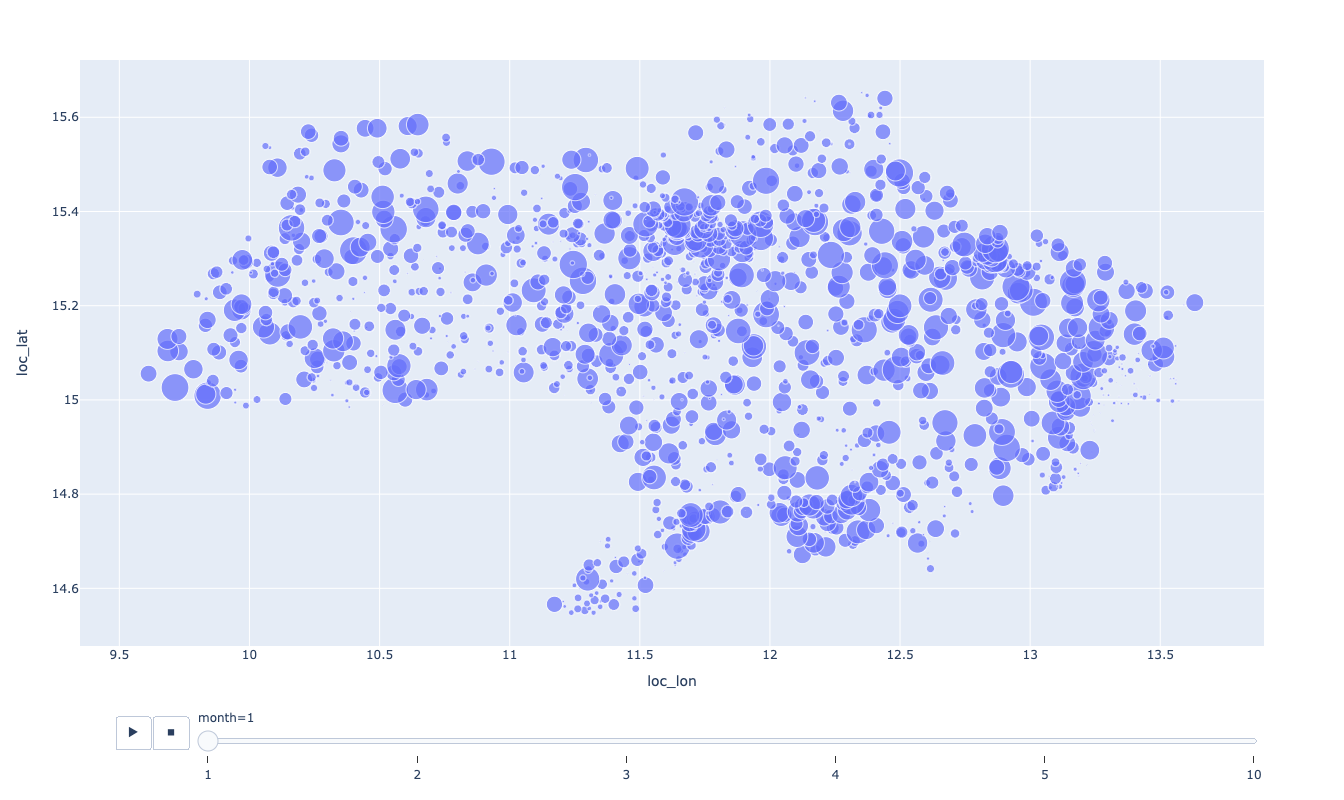

In [59]:
px.scatter(animatiodf[animatiodf.traffic < 1000], 
           y="loc_lat", x="loc_lon", animation_frame="month", 
           animation_group="traffic", size="traffic", height=800)

In [64]:
trafficdf = stationdf.loc[:, ('traff_m1', 'traff_m2', 'traff_m3', 'traff_m4', 'traff_m5', 'target')]
trafficdf['quantiles'] = pd.qcut(trafficdf.target, 5,
                                     labels=['1-quantile', '2-quantile', '3-quantile', '4-quantile', '5-quantile'])

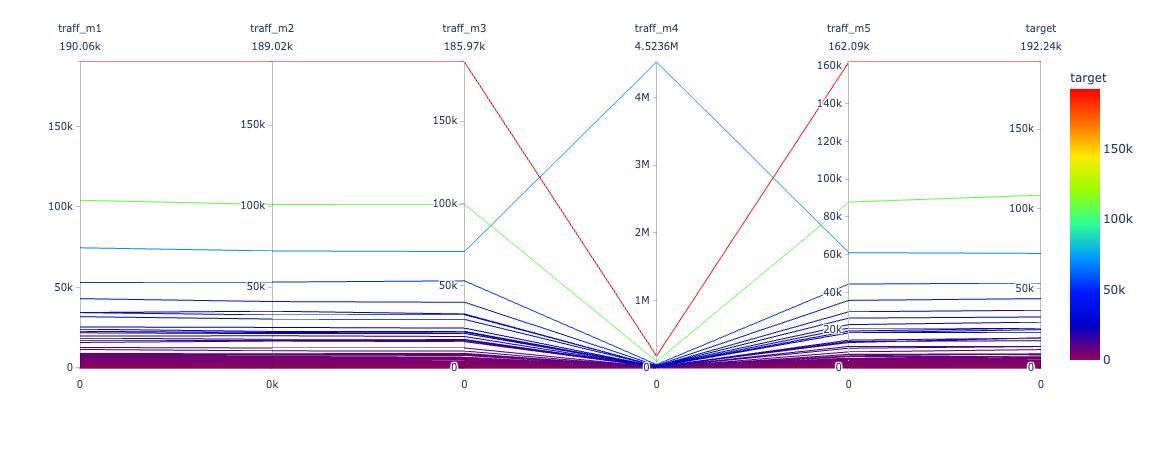

In [76]:
fig = px.parallel_coordinates(trafficdf, color="target",
                              dimensions=['traff_m1', 'traff_m2', 'traff_m3', 'traff_m4', 'traff_m5', 'target'],
                              color_continuous_scale=px.colors.sequential.Rainbow)
fig.show()

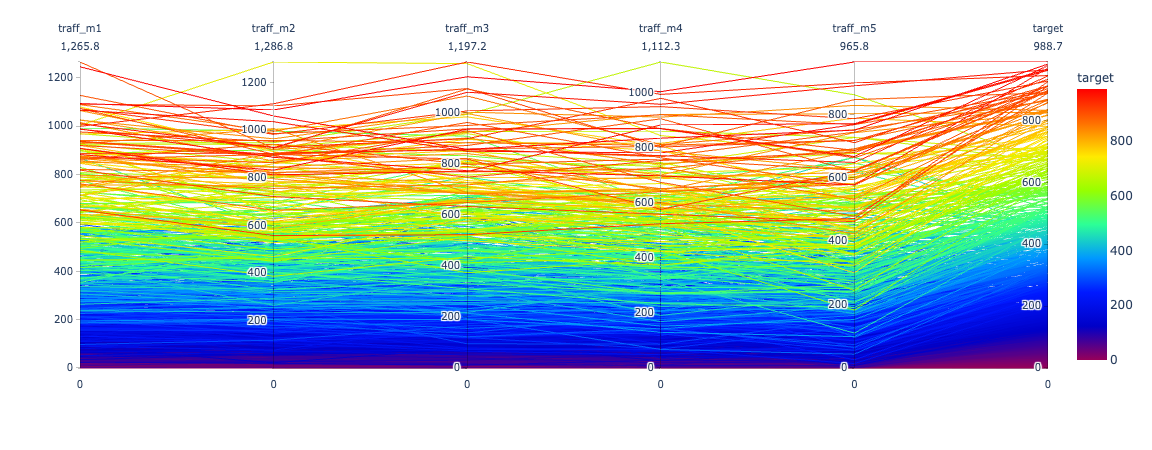

In [110]:
fig = px.parallel_coordinates(trafficdf[trafficdf.target < 1000], color="target",
                              dimensions=['traff_m1', 'traff_m2', 'traff_m3', 'traff_m4', 'traff_m5', 'target'],
                              color_continuous_scale=px.colors.sequential.Rainbow)
fig.show()

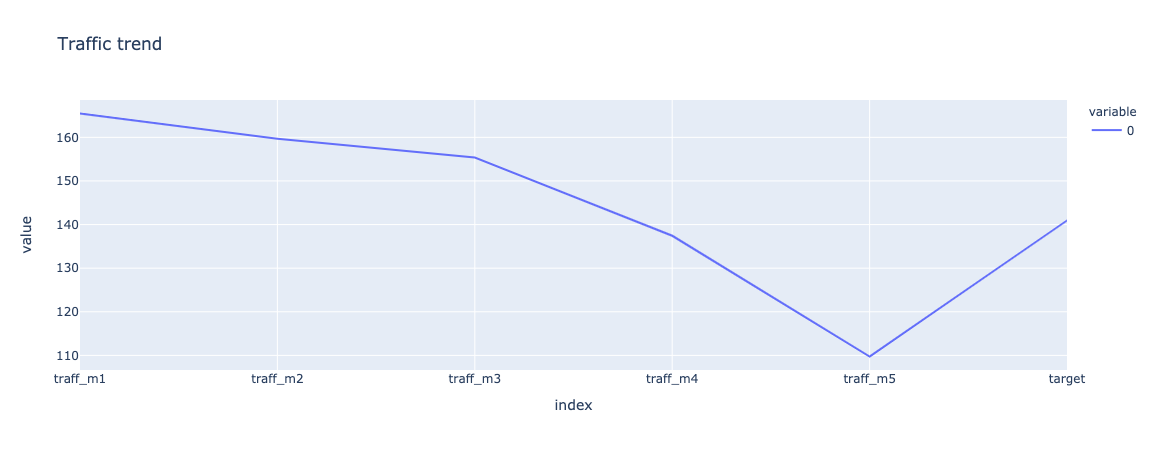

In [109]:
px.line(stationdf[['traff_m1', 'traff_m2', 'traff_m3', 'traff_m4', 'traff_m5', 'target']].median()
        , title='Traffic trend').show()